In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
secretnumber='10101101001'

#circuit = QuantumCircuit(6+1,6)
circuit = QuantumCircuit(len(secretnumber)+1,len(secretnumber))

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))


#circuit.x(6)
#circuit.h(6)
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

for index, yesno_answer in enumerate(reversed(secretnumber)):
    if yesno_answer  == '1':
        circuit.cx(index, len(secretnumber))
#circuit.cx(5,6)
#circuit.cx(3,6)
#circuit.cx(0,6)

circuit.barrier()
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))

circuit.barrier()
circuit.measure(range(len(secretnumber)),range(len(secretnumber)))


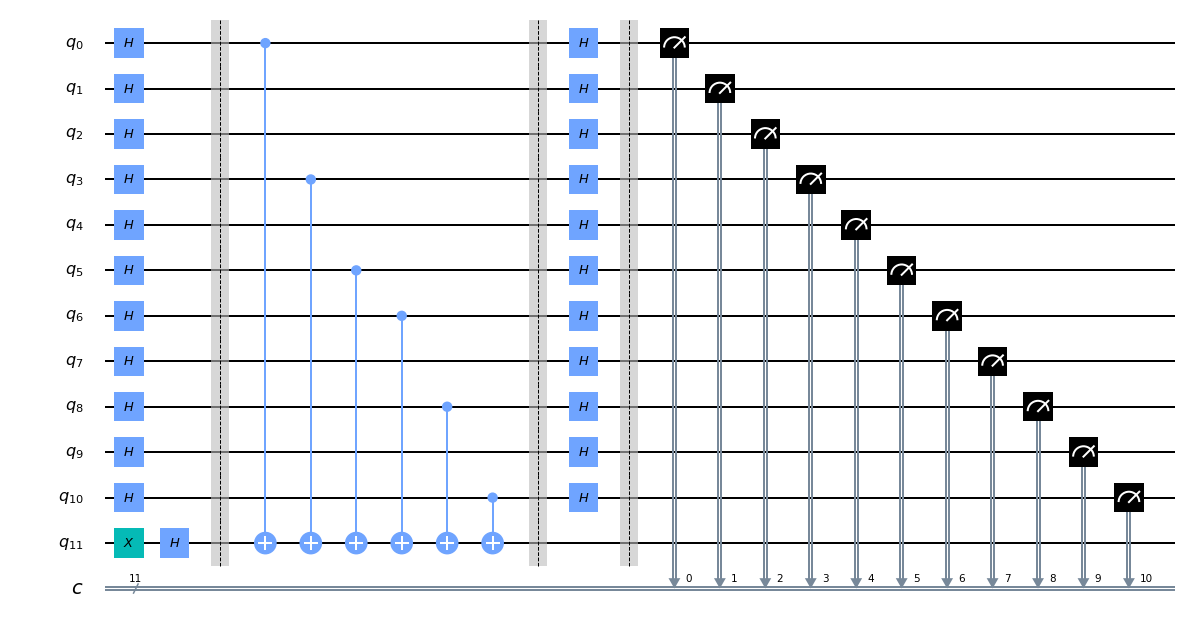

In [2]:
circuit.draw(output='mpl')

In [3]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots =1).result()
counts = result.get_counts()
print(counts)

{'10101101001': 1}
